# Universidade Federal do Rio Grande do Norte
## Programa de Pós-graduação em Engenharia Elétrica e de Computação
### Course: Tópicos Especiais C - Data Science Foundation
### Professor: Ivanovitch Silva
### Students: 

* Aguinaldo Bezerra Batista Júnior
* Pedro Klisley Ferreira da Silva
* Ycaro Ravel Dantas

#### Activity: Project 4
#### Subject: IES employees gender analysis
#### Objectives: Analyze gender in IES employees from webscrapped data of Portal da Transparência 
#### Base dataset: number_of_employees.csv

### 0 Loading Libraries and base dataset

In [89]:
# Loading needed libraries
import pandas as pd
import requests as requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint

This activity starts with building a dataset based webscrapped data from [Portal da Transparência](http://www.portaldatransparencia.gov.br/).

In this initial webscrapping process, data was obtained from the [UFRN](http://http://www.portaltransparencia.gov.br/servidores/OrgaoExercicio-ListaServidores.asp?CodOrg=26243) page in [Portal da Transparência](http://www.portaldatransparencia.gov.br/). In this activity we have to go deeper in the webscrapping proccess and obtain more data from several pages in that website.

### 1 Retrieving UFRN employee data
The webscrapping process starts with the analysis of [Portal da Transparência](http://www.portaldatransparencia.gov.br/) webpage structure:
* UFRN main page
    - UFRN employees pages

UFRN may have several pages listing employees, so we must access all of them to get the desired data

In [90]:
# Base URL to access the institutions's list of employees
ufrn_url = 'http://www.portaltransparencia.gov.br/servidores/OrgaoExercicio-ListaServidores.asp?CodOrg=26243'
#ufrn_url = 'http://www.portaltransparencia.gov.br/servidores/OrgaoLotacao-ListaServidores.asp?CodOrg=26243'

In [93]:
# Retrieving content from the main page of the target institution
response = requests.get(ufrn_url)
# Parsing content
ufrn_html = BeautifulSoup(response.text, 'html.parser')
# Discovering the number of pages per institution
npages = ufrn_html.find('p', class_='paginaAtual').text.rsplit('/',1)[1]
print(npages)

413


We have found UFRN site has 413 pages listing the 6183 UFRN employees.

In [94]:
names = []
#npages = 1
# Gathering data from UFRN employee pages
for page in range(1,int(npages)+1):
        
    page_url = ufrn_url+'&Pagina={}'.format(page).replace(" ", "")
        
    resp = requests.get(page_url)
    
    # Throw a warning for non-200 status codes
    while resp.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        sleep(randint(5,10))
        resp = requests.get(page_url)  

    # Pause the loop
    sleep(randint(5,10))
        
    # Retrieving content for the page
    page_html = BeautifulSoup(resp.text, 'html.parser')
        
    page_table_rows = page_html.find_all('td')
            
    # Getting names in each page
    for row in page_table_rows:
        name = row.find('a')
            
        if name is not None:
            name = name.text.strip()
            names.append(name)
                

Now, with scrapped data in hands, a new dataframe can be built. The absent gender information problem will be addressed in next section

In [95]:
# Building a new dataset based on the lists built from webscrapying
columns = ['Name','Guessed_Gender']
ufrn_employees_df = pd.DataFrame(columns=columns)
ufrn_employees_df.Name = names
ufrn_employees_df.Guessed_Sex = None

In [96]:
ufrn_employees_df.to_csv('ufrn_employees_df.csv')
ufrn_employees_df

,Name,Guessed_Gender
0,ABDO FARRET NETO,NaN
1,ABMAEL BEZERRA DE OLIVEIRA,NaN
2,ABNER CARLOS COSTA DE MELO,NaN
3,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,NaN
4,ACACIA JESSICA MAIA DE MOURA,NaN
5,ACACIO MEDEIROS NOGUEIRA,NaN
6,ACILENE MARIA BORGES GOMES OLIVEIRA,NaN
7,ACSA NARA DE ARAUJO BRITO BARROS,NaN
8,ACYNELLY DAFNE DA SILVA NUNES,NaN
9,ADA CRISTINA SCUDELARI,NaN


### 2 Guessing Genders
Generally, person's first name is closed related to gender. So, it may be possible to guess gender from a person's firts name using some libraries and APIs.

Our first approach is to use the [GenderBR](http://fmeireles.com/blog/rstats/genderbr-predizer-sexo) package availabe in R (CRAN) to try to predict gender from a person's first name. We have chosen this package because it bases its prediction on IBGE official data. So, clearly it is an accurate and offline approach to guess gender for brazilian names.

In [16]:
# We are able to run R commands in ipython using this python library
import rpy2.robjects as robjects
%load_ext rpy2.ipython

In [17]:
%%R 
# Need to load this R library for gender guessing
suppressMessages(library(genderBR))

In [75]:
genders = []
# Using robjects to run R procedures
for name in ufrn_employees_df.Name:
        name = name.split()[0]
        gender = robjects.r.get_gender(name, threshold = 0.95)
        gender = gender.r_repr()
        gender = gender.strip('\"')
        if gender.startswith('NA'):
            gender = None
        genders.append(gender)

In [76]:
ufrn_employees_df.Guessed_Gender = genders

In [77]:
ufrn_employees_df

,Name,Guessed_Gender
0,ABDO FARRET NETO,Male
1,ABMAEL BEZERRA DE OLIVEIRA,Male
2,ABNER CARLOS COSTA DE MELO,Male
3,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,Male
4,ACACIA JESSICA MAIA DE MOURA,Female
5,ACACIO MEDEIROS NOGUEIRA,Male
6,ACILENE MARIA BORGES GOMES OLIVEIRA,Female
7,ACSA NARA DE ARAUJO BRITO BARROS,Female
8,ACYNELLY DAFNE DA SILVA NUNES,None
9,ADA CRISTINA SCUDELARI,None


R's [GenderBR](http://fmeireles.com/blog/rstats/genderbr-predizer-sexo) did a very good job in gender guessing, however it failed to predict gender for some names. So, a next plausible approach is to use some online API. We have found that the free [Genderize.io](https://genderize.io) dabase contains thousands of distinct names across several countries and languages. This API is keyless but limited to generous 1000 names/day.

In [78]:
# No API key required for genderize.io
def genderize_io(genderless_name):
    genderless_name = genderless_name.split()[0]
    api_url='https://api.genderize.io/?name={}'.format(genderless_name).replace(" ", "")
    gender = requests.get(api_url,timeout=10).json().get('gender')
    if(gender): # genderize_io responds null when genre is not detected
        return gender.capitalize()
    else:
        return None

In [79]:
for index,row in ufrn_employees_df.iterrows():
    if row[1] is None:
        gen = genderize_io(row[0])
        # Pause the loop
        sleep(randint(5,10))
        if(gen):
            ufrn_employees_df.Guessed_Gender.loc[index] = gen

In [80]:
ufrn_employees_df

,Name,Guessed_Gender
0,ABDO FARRET NETO,Male
1,ABMAEL BEZERRA DE OLIVEIRA,Male
2,ABNER CARLOS COSTA DE MELO,Male
3,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,Male
4,ACACIA JESSICA MAIA DE MOURA,Female
5,ACACIO MEDEIROS NOGUEIRA,Male
6,ACILENE MARIA BORGES GOMES OLIVEIRA,Female
7,ACSA NARA DE ARAUJO BRITO BARROS,Female
8,ACYNELLY DAFNE DA SILVA NUNES,None
9,ADA CRISTINA SCUDELARI,Female


The genres for some names are still not detected. Our last try is to submit these genderless names to the [Gender API](https://gender-api.com/). This API uses keys and has severe usage limitations (500 request/month), so we have used several keys.

In [81]:
# Gender API needs a key and has strong limits
keys = ['LpLdCSUsylUylBtYfD','vCBtYeHXDNxYQymeJu']
def gender_api(genderless_name):
    key = keys[0]
    stats = requests.get('https://gender-api.com/get-stats?&key={}'.format(key).replace(" ", "")).json().get('is_limit_reached')
    if(stats): # change keys if limit exceeded
        key = keys[1]
    genderless_name = genderless_name.split()[0]
    api_url='https://gender-api.com/get?name={}&country=BR&key={}'.format(genderless_name,key).replace(" ", "")
    gender = requests.get(api_url,timeout=10).json().get('gender')
    if(gender):
        return gender.capitalize()
    else:
        return None

In [82]:
for index,row in ufrn_employees_df.iterrows():
    if row[1] is None:
        gen = gender_api(row[0])
        # Pause the loop
        sleep(randint(5,10))
        if(gen):
            ufrn_employees_df.Guessed_Gender.loc[index] = gen

In [86]:
ufrn_employees_df

,Name,Guessed_Gender
0,ABDO FARRET NETO,Male
1,ABMAEL BEZERRA DE OLIVEIRA,Male
2,ABNER CARLOS COSTA DE MELO,Male
3,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,Male
4,ACACIA JESSICA MAIA DE MOURA,Female
5,ACACIO MEDEIROS NOGUEIRA,Male
6,ACILENE MARIA BORGES GOMES OLIVEIRA,Female
7,ACSA NARA DE ARAUJO BRITO BARROS,Female
8,ACYNELLY DAFNE DA SILVA NUNES,Unknown
9,ADA CRISTINA SCUDELARI,Female


### 3 Gender Analysis in UFRN

In [87]:
ufrn_employees_df.Guessed_Gender.value_counts()

Male       7
Female     7
Unknown    1
Name: Guessed_Gender, dtype: int64

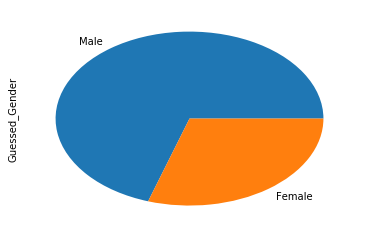

In [88]:
%matplotlib inline
ies_employees_df.Guessed_Gender.value_counts().plot(kind='pie')